<a href="https://colab.research.google.com/github/Shwetarhonnikoppa/Python--Amazon-Sales-Report/blob/main/Copy_of_Amazon_sales_report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import datetime as dt

In [ ]:
df = pd.read_csv("/content/Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [ ]:
# Display the first few rows and the column names with data types
df.head()
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [ ]:
#  Data Cleaning
df['Date'] = df['Date'].apply(lambda x: re.sub(r'(\d{2})-(\d{2})-(\d{4})', r'\1-\2-\2', x) if re.match(r'\d{2}-\d{2}-\d{4}', x) else x)

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [ ]:
# Handle missing values
df['ship-postal-code'].fillna(0, inplace=True)
df['fulfilled-by'].fillna(df['fulfilled-by'].mode()[0], inplace=True)

In [ ]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [ ]:
# Display summary of missing values and cleaned data types
print("Missing Values After Cleaning:\n", df_cleaned.isnull().sum())
print("Data Types After Cleaning:\n", df_cleaned.dtypes)

Missing Values After Cleaning:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                  7789
ship-city                 33
ship-state                33
ship-postal-code           0
ship-country              33
B2B                        0
fulfilled-by               0
New                   128808
PendingS              128808
dtype: int64
Data Types After Cleaning:
 index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                  

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Generate summary statistics for numerical columns
summary_stats = df_cleaned.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                index                           Date            Qty  \
count  128808.000000                         128808  128808.000000   
mean    64564.582906  2015-08-22 12:43:21.900503040       0.904416   
min         0.000000            2001-04-01 00:00:00       0.000000   
25%     32368.750000            2007-06-07 00:00:00       1.000000   
50%     64570.500000            2022-04-18 00:00:00       1.000000   
75%     96772.250000            2022-05-22 00:00:00       1.000000   
max    128974.000000            2022-06-29 00:00:00      15.000000   
std     37193.614079                            NaN       0.313373   

              Amount  ship-postal-code  New  PendingS  
count  121019.000000     128808.000000  0.0       0.0  
mean      648.631921     463838.207464  NaN       NaN  
min         0.000000          0.000000  NaN       NaN  
25%       449.000000     382421.000000  NaN       NaN  
50%       605.000000     500033.000000  NaN       NaN  
75%       78

In [ ]:
# Generate frequency counts for categorical columns
frequency_counts = df_cleaned.select_dtypes(include=['object']).apply(pd.Series.value_counts)
print("Frequency Counts:\n", frequency_counts)

Frequency Counts:
                                                 Order ID  Status  Fulfilment  \
(Chikmagalur disterict).     (N.R pur thaluku)       NaN     NaN         NaN   
(Via Cuncolim)Quepem,South Goa                       NaN     NaN         NaN   
,HYDERABAD                                           NaN     NaN         NaN   
,raibarely road faizabad (Ayodhya)                   NaN     NaN         NaN   
..katra                                              NaN     NaN         NaN   
...                                                  ...     ...         ...   
yavatmal                                             NaN     NaN         NaN   
yazali                                               NaN     NaN         NaN   
yellapur                                             NaN     NaN         NaN   
zirakpur                                             NaN     NaN         NaN   
������������                                         NaN     NaN         NaN   

                    

In [ ]:
#  Sales Overview
# Aggregate sales data by month, quarter, and year
df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')
df_cleaned['Quarter'] = df_cleaned['Date'].dt.to_period('Q')
df_cleaned['Year'] = df_cleaned['Date'].dt.to_period('A')

monthly_sales = df_cleaned.groupby('Month')['Amount'].sum()
quarterly_sales = df_cleaned.groupby('Quarter')['Amount'].sum()
yearly_sales = df_cleaned.groupby('Year')['Amount'].sum()

<ipython-input-25-f96115cc81f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')
<ipython-input-25-f96115cc81f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Quarter'] = df_cleaned['Date'].dt.to_period('Q')
<ipython-input-25-f96115cc81f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

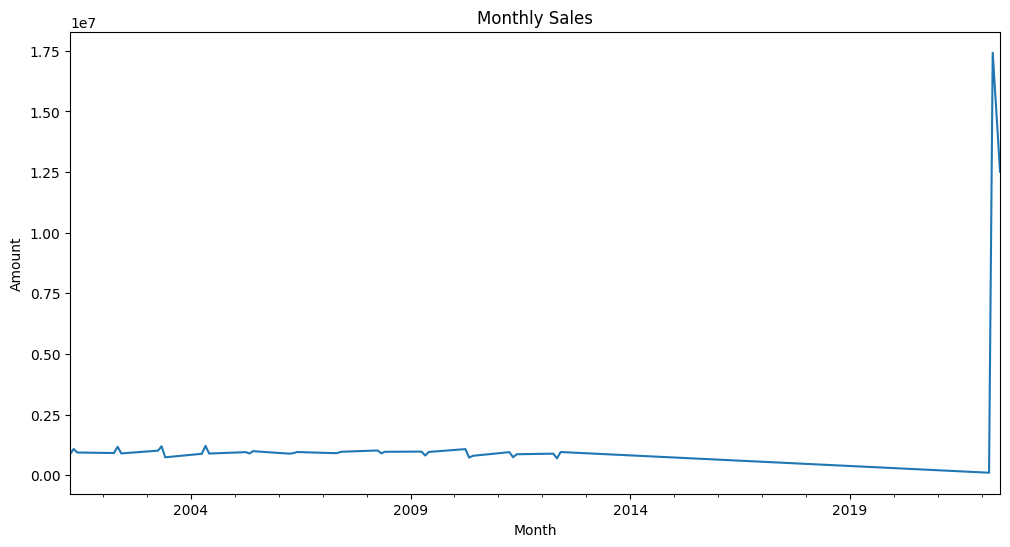

In [ ]:
# Plot sales data
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', title='Monthly Sales', ylabel='Amount', xlabel='Month')
plt.show()

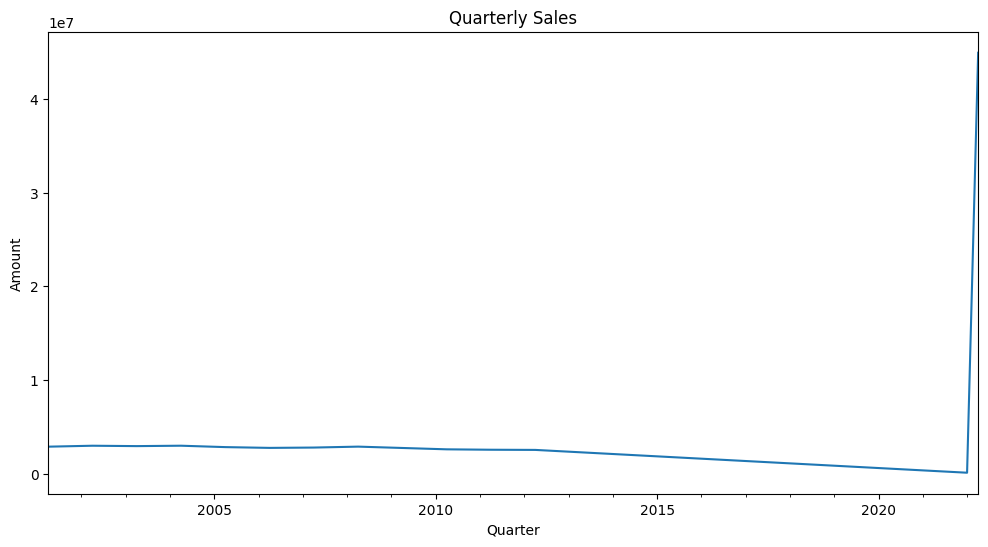

In [ ]:
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', title='Quarterly Sales', ylabel='Amount', xlabel='Quarter')
plt.show()

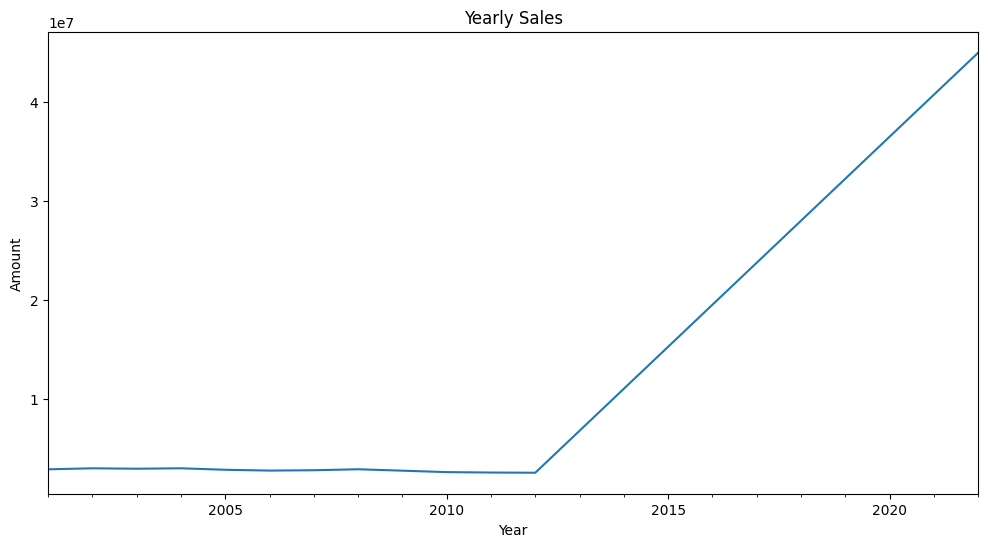

In [ ]:
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', title='Yearly Sales', ylabel='Amount', xlabel='Year')
plt.show()

In [ ]:
# Product Analysis
# Analyze the distribution of sales across different product categories, sizes, and quantities
category_sales = df_cleaned.groupby('Category')['Amount'].sum()
size_sales = df_cleaned.groupby('Size')['Amount'].sum()
quantity_sales = df_cleaned['Qty'].value_counts()

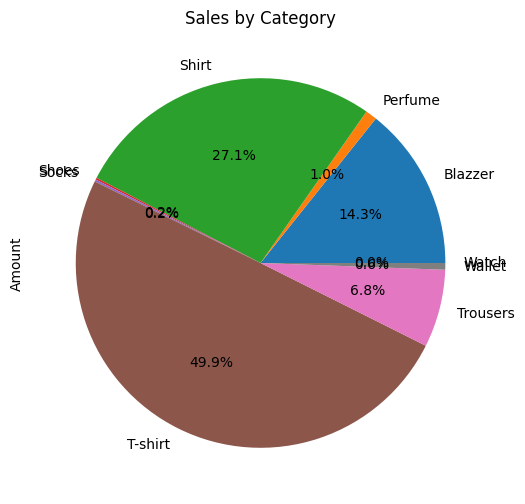

In [ ]:
# Plot category distribution
plt.figure(figsize=(12, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.show()

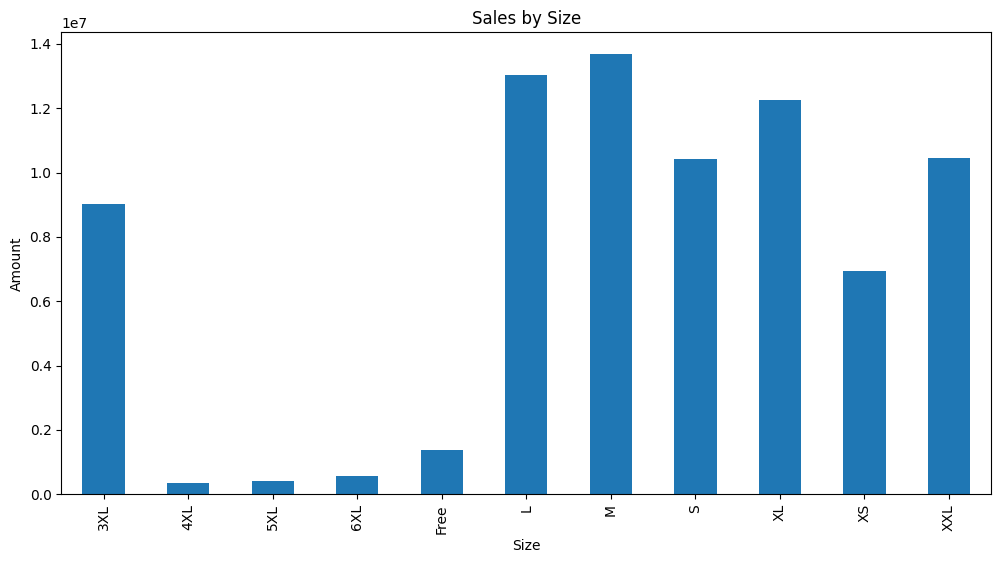

In [ ]:
# Plot size distribution
plt.figure(figsize=(12, 6))
size_sales.plot(kind='bar', title='Sales by Size', ylabel='Amount', xlabel='Size')
plt.show()

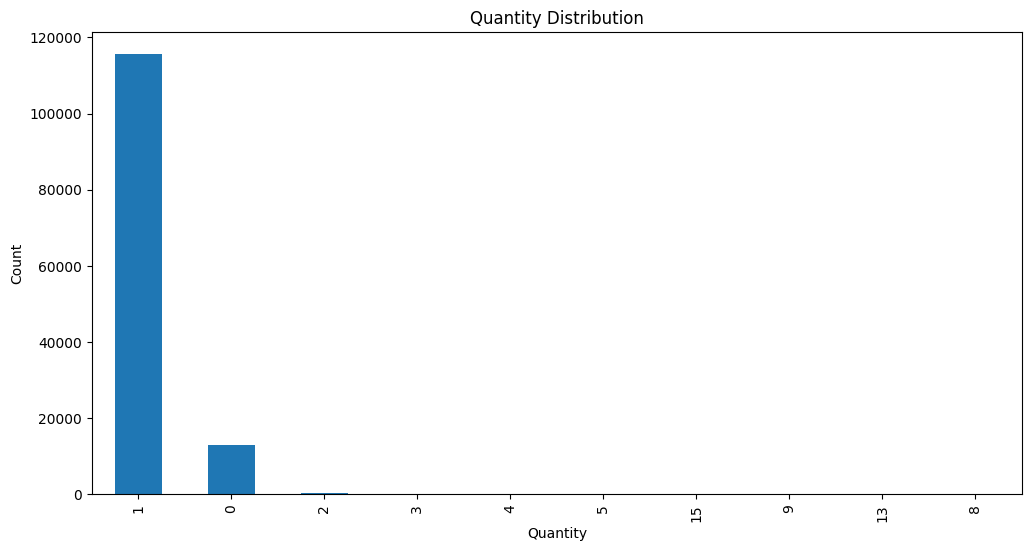

In [ ]:
# Plot quantity distribution
plt.figure(figsize=(12, 6))
quantity_sales.plot(kind='bar', title='Quantity Distribution', ylabel='Count', xlabel='Quantity')
plt.show()

In [ ]:
# Fulfillment Analysis
# Evaluate the performance of different fulfillment methods
fulfillment_performance = df_cleaned.groupby('Fulfilment')['Amount'].sum()
delivery_times = df_cleaned.groupby('Fulfilment')['Date'].apply(lambda x: (x.max() - x.min()).days)

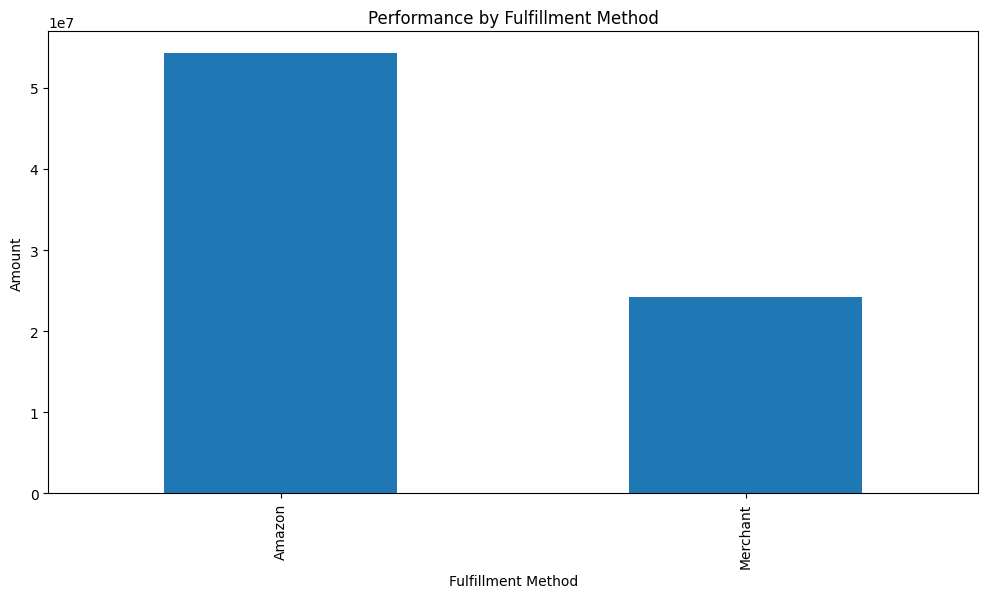

In [ ]:
# Plot fulfillment performance
plt.figure(figsize=(12, 6))
fulfillment_performance.plot(kind='bar', title='Performance by Fulfillment Method', ylabel='Amount', xlabel='Fulfillment Method')
plt.show()

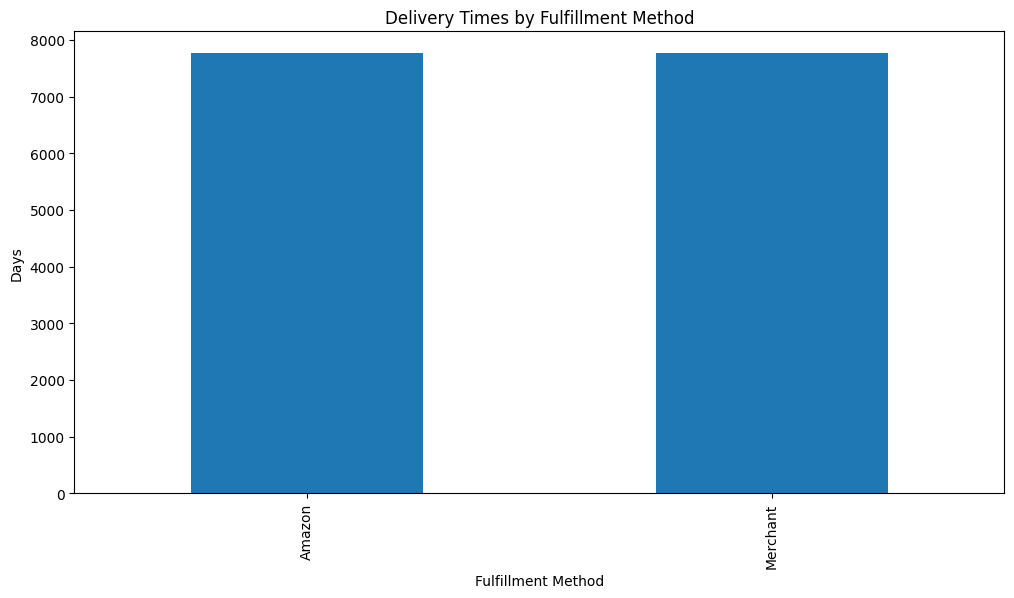

In [ ]:
# Plot delivery times
plt.figure(figsize=(12, 6))
delivery_times.plot(kind='bar', title='Delivery Times by Fulfillment Method', ylabel='Days', xlabel='Fulfillment Method')
plt.show()

In [ ]:
#  Customer Segmentation
# Segment customers based on their buying behavior
customer_segments = df_cleaned.groupby('Order ID').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'Date': 'count'
}).rename(columns={'Date': 'Order Count'})

In [ ]:
# Cluster analysis for segmentation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
customer_segments['Cluster'] = kmeans.fit_predict(customer_segments)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


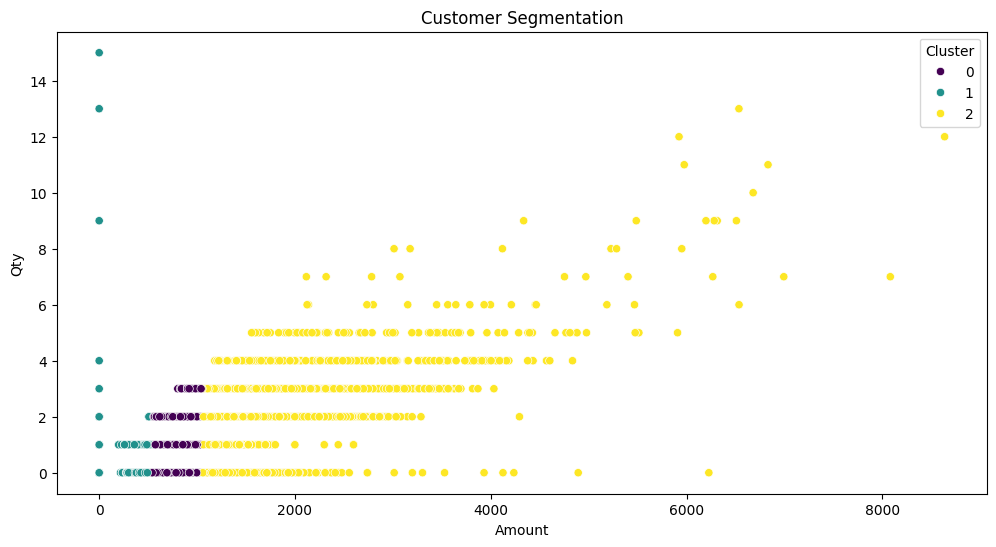

In [ ]:
# Plot customer segments
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_segments, x='Amount', y='Qty', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
# Geographical Analysis
# Map sales data to geographical locations
state_sales = df_cleaned.groupby('ship-state')['Amount'].sum()

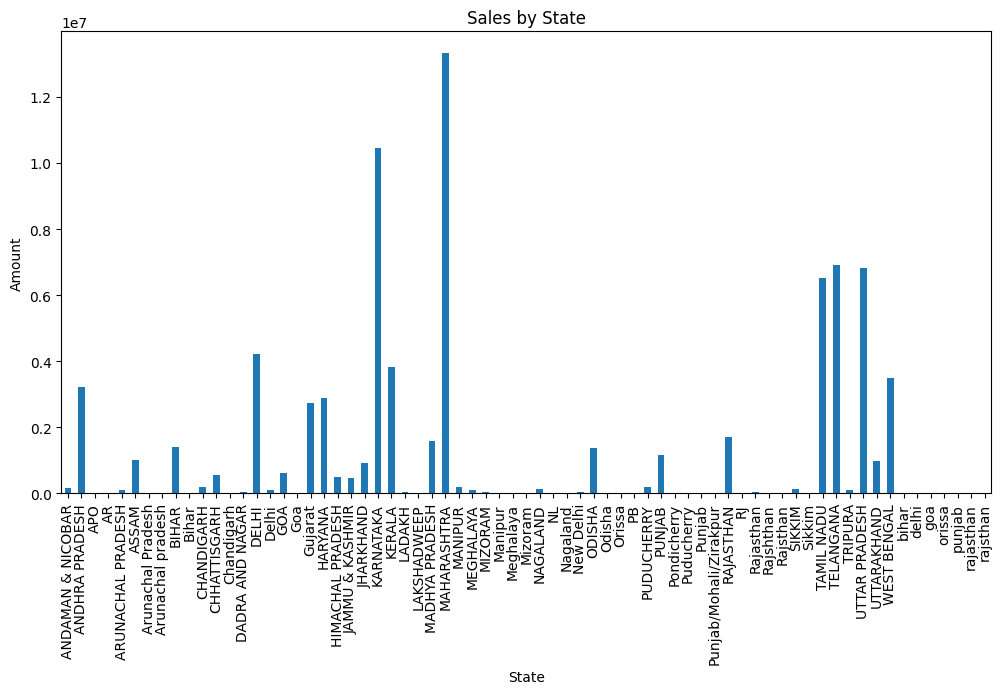

In [ ]:
# Plot geographical sales distribution
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', title='Sales by State', ylabel='Amount', xlabel='State')
plt.show()